# Aerofit - Business Case Study

## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

- Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
- For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Product Portfolio:

- The KP281 is an entry-level treadmill that sells for \\$1,500.
- The KP481 is for mid-level runners that sell for \\$1,750.
- The KP781 treadmill is having advanced features that sell for \\$2,500.

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the csv file "Aerofit.csv" and store it in a dataframe
df = pd.read_csv("Aerofit.csv")

In [3]:
# Display first 10 rows
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


### Dataset Description

- Product Purchased:	KP281, KP481, or KP781
- Age:	In years
- Gender:	Male/Female
- Education:	In years
- MaritalStatus:	Single or partnered
- Usage:	The average number of times the customer plans to use the treadmill each week.
- Income:	Annual income (in \\$)
- Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles:	The average number of miles the customer expects to walk/run each week

#### Observation:
1. No nested data

2. Product, Gender, Marital Status are categorical columns

3. The dataset only has few columns, Age, Gender, Education, MaritalStatus, Usage, Fitness, Income and Miles. We need to findout the type of treadmill one would buy based on the given columns

In [5]:
# Generate descriptive statistics for all columns in the DataFrame, including both numerical and categorical data
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


## Observations -

1. Most of the entries are for treadmill KP281, which is an entry level treadmill, meaning that most of the customers in this data are beginners. 

2. The top Gender is Male, meaning that most of the purchases are done by Male.

3. The top MaritalStatus is "Partnered", meaning that most of the purchases are done by people who are married.

4. The mean for Fitness is 3.3, meaning most people considers themselves average on their fitness scale.

5. 75% of the customers are under the age of 33, meaning most of their customers are young.

   Insight: Aerofit should target their adds to people below the age of 35.

6. The average distance people run is 103 but the max is 360, that means their are some outliers, hence the standard deviation of 51.86.

7. On an average people use their treadmills 3 times everyday

In [6]:
# Display a concise summary of the DataFrame, including the column names, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB



Age, Education, Usage, Fitness, Income and Miles are integer values while Product, Gender and MaritalStatus are of object datatype.

## Missing Value Detection

In [7]:
# Check the count of null values per column in the DataFrame
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no missing values in this dataset.

In [62]:
# Selecting rows in the DataFrame where the 'Product' column is equal to 'KP281' and calculating its descriptive statistics
df[df['Product']=='KP281'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


#### OBSERVATIONS

Some of the important conclusions that can be drawn by looking at our results are:

- Exactly 80 customers purchased KP281 Model.
- The average age of customers who bought KP281 is 28.5, whereas the min and max age are 18 and 50 respectively.
- Average Education is 15 and median is 16.
- Expected usage is 3 day a week
- Average fitness is 2.9
- Expected miles is 82.78 each week

In [63]:
# Selecting rows in the DataFrame where the 'Product' column is equal to 'KP481' and calculating its descriptive statistics
df[df['Product']=='KP481'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


#### OBSERVATIONS

- There are 60 customers who purchased KP481 Model
- Average age of customer who purchases KP481 is 28.9 , Median is 26 . Age is right skewed. Customer age range is between 24-33.
- Average Education is 15 and median is 16.
- Expected usage is 3 days a week.
- Average fitness is 2.9
- Expected miles is 87.9 each week.

#### Note - The observations are quite similar to what we saw for KP281, no huge difference in data

In [64]:
# Selecting rows in the DataFrame where the 'Product' column is equal to 'KP781' and calculating its descriptive statistics
df[df['Product']=='KP781'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


#### OBSERVATIONS

- There are 40 customers who purchased KP781 Model
- Average age of customer who purchases KP781 is 29.1 , Median is 27, whereas the min and max age are 22 and 48 respectively. 
- Average Education is 17 and median is 18.
- Expected usage is 5 days a week.
- Average fitness is 4.6 (Excellent Shape)
- Expected miles is 166.9 each week.

#### Note - The observations are very different from what we saw for KP281 and KP481. The customers are in excellent shape, and their expected usage is 5 days a week compared to 3 days a week for KP281 and KP481. And on an average these customers are expected to run twice the distance compared to KP281 and KP481.

In [65]:
# Creating a cross-tabulation (cross-tab) table between 'Gender' and 'Product' columns in the DataFrame
pd.crosstab(df['Gender'], df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [6]:
# Joint Probability
pd.crosstab(df['Gender'], df['Product'], margins=True, normalize=True)*100
'''
This signifies, probability of female buying KP781 is 3.88%
'''

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [8]:
# Conditional Probability
pd.crosstab(df['Gender'], df['Product'], margins=True, normalize='index')*100
'''
The probability of buying KP781 given that its a male is 31.73%. P(KP781|Male) = 31.73%
'''

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


#### OBSERVATIONS

- Equal number of customers who purchased KP281 were Male as well as Female.
- Number of customers who purchased KP481 were more Males than Females.
- There are considerably more Males (close to 5 times than females) than there are Females who purchased KP781.

In [66]:
# Creating a cross-tabulation (cross-tab) table between 'MaritalStatus' and 'Product' columns in the DataFrame
pd.crosstab(df['MaritalStatus'], df['Product'])

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


#### OBSERVATIONS

- There are considerably more Partnered customers for all three types products

In [67]:
# Creating a cross-tabulation (cross-tab) table between 'Fitness' and 'Product' columns in the DataFrame
pd.crosstab(df['Fitness'], df['Product'])

Product,KP281,KP481,KP781
Fitness,,,
1,1,1,0
2,14,12,0
3,54,39,4
4,9,8,7
5,2,0,29


#### OBSERVATIONS

- Most of the KP281 and KP481 customers are average on fitness scale (3)
- Close to 70% of KP781 customers are in excellent shape

In [68]:
# Creating a cross-tabulation (cross-tab) table between 'Usage' and 'Product' columns in the DataFrame
pd.crosstab(df['Usage'], df['Product'])

Product,KP281,KP481,KP781
Usage,,,
2,19,14,0
3,37,31,1
4,22,12,18
5,2,3,12
6,0,0,7
7,0,0,2


#### OBSERVATIONS

- Most of the KP281 and KP481 customers plan to use the product 2 to 4 times per week.
- Close to 95% of KP781 customers plan to use the product 4 or more time per week.

In [69]:
# Creating a pivot table using the 'Income' column as the values, with 'Product' and 'Gender' as the index, and 'MaritalStatus' as the columns

pd.pivot_table(df,'Income', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
KP281   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
KP481   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
KP781   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

#### OBSERVATIONS

- The average income is maximum for KP781 customers who are married females.
- The average income is minimum for KP281 customers who are single males.
- There is a considerable difference between the income of KP781 customers who are partnered vs who are single

In [70]:
# Creating a pivot table using the 'Miles' column as the values, with 'Product' and 'Gender' as the index, and 'MaritalStatus' as the columns

pd.pivot_table(df,'Miles', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus    Partnered      Single
Product Gender                        
KP281   Female   74.925926   78.846154
        Male     80.190476   99.526316
KP481   Female   94.000000   80.214286
        Male     87.238095   91.100000
KP781   Female  215.000000  133.333333
        Male    176.315789  147.571429

#### OBSERVATIONS

- KP781 Married females plan to run on an average 215 miles per week while KP781 single females plan to run on an average 133 miles per week.
- In all the three categories of the treadmills single males plan to run more miles compared to single females. 
- KP481 and KP781 married females plan to run more miles compared to married males, which is not the case with KP281 customers, where married males plan to run more miles then married females

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Usage'}>,
        <Axes: title={'center': 'Fitness'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Miles'}>]], dtype=object)

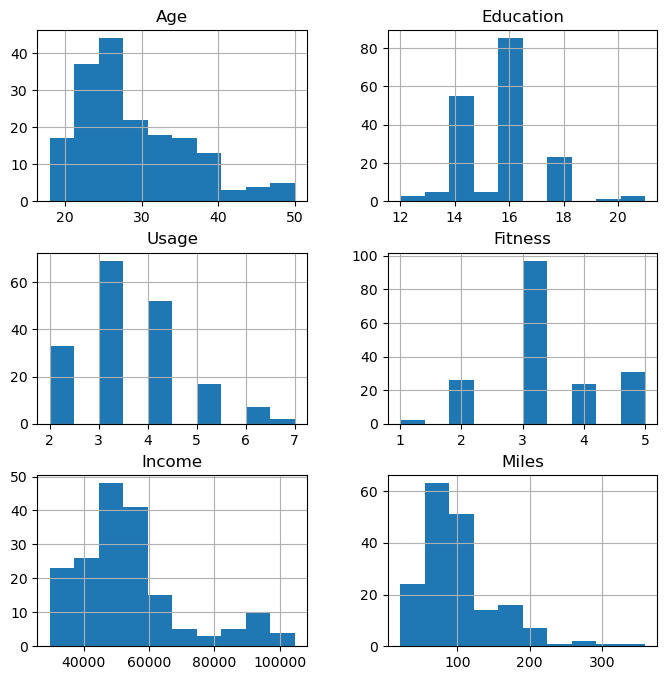

In [71]:
# Creating a histogram for each numerical column in the DataFrame with a specified figure size

df.hist(figsize=(8,8))

#### OBSERVATIONS

- Age Range: 17 - 50. Maximum customers between 20 to 30 years
- Education Range: 12 - 20. Maximum customers between 14 - 16 years
- Planned Usage Range: 2 - 7. Maximum customers between 3 - 4 times per week
- Fitness Range: 1 - 5. Maximum customers at 3 (Average fitness level)
- Income Range: 30k - 100k. Maximum customers between 40k - 60k
- Planned Miles Range: 50 - 350. Maximum customers between 50 - 120 miles per week

<Axes: xlabel='Product', ylabel='count'>

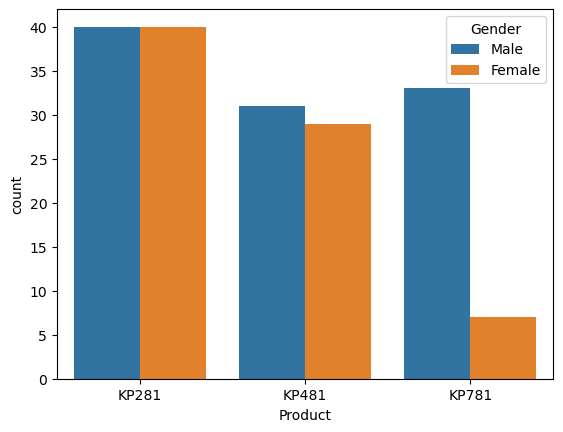

In [72]:
# Creating a countplot using Seaborn library, with 'Product' on the x-axis, 'Gender' as the hue, and using data from the DataFrame df
sns.countplot(x='Product', hue='Gender', data=df)

#### OBSERVATIONS

- The count of male and female customers is approximately same for KP281 and KP481, whereas there is a huge difference in count of male and female customers for KP781
- KP781 has close to 5 times of the male customers then females

<Axes: xlabel='Product', ylabel='count'>

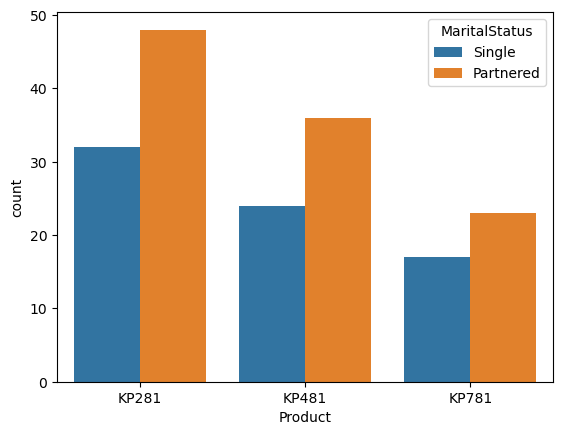

In [73]:
# Creating a countplot using Seaborn library, with 'Product' on the x-axis, 'MaritalStatus' as the hue, and using data from the DataFrame df

sns.countplot(x='Product', hue='MaritalStatus', data=df)

#### OBSERVATIONS

- People tend to buy fitness equipments more after they are married then when they are single. This is applicable to all the three categories of products

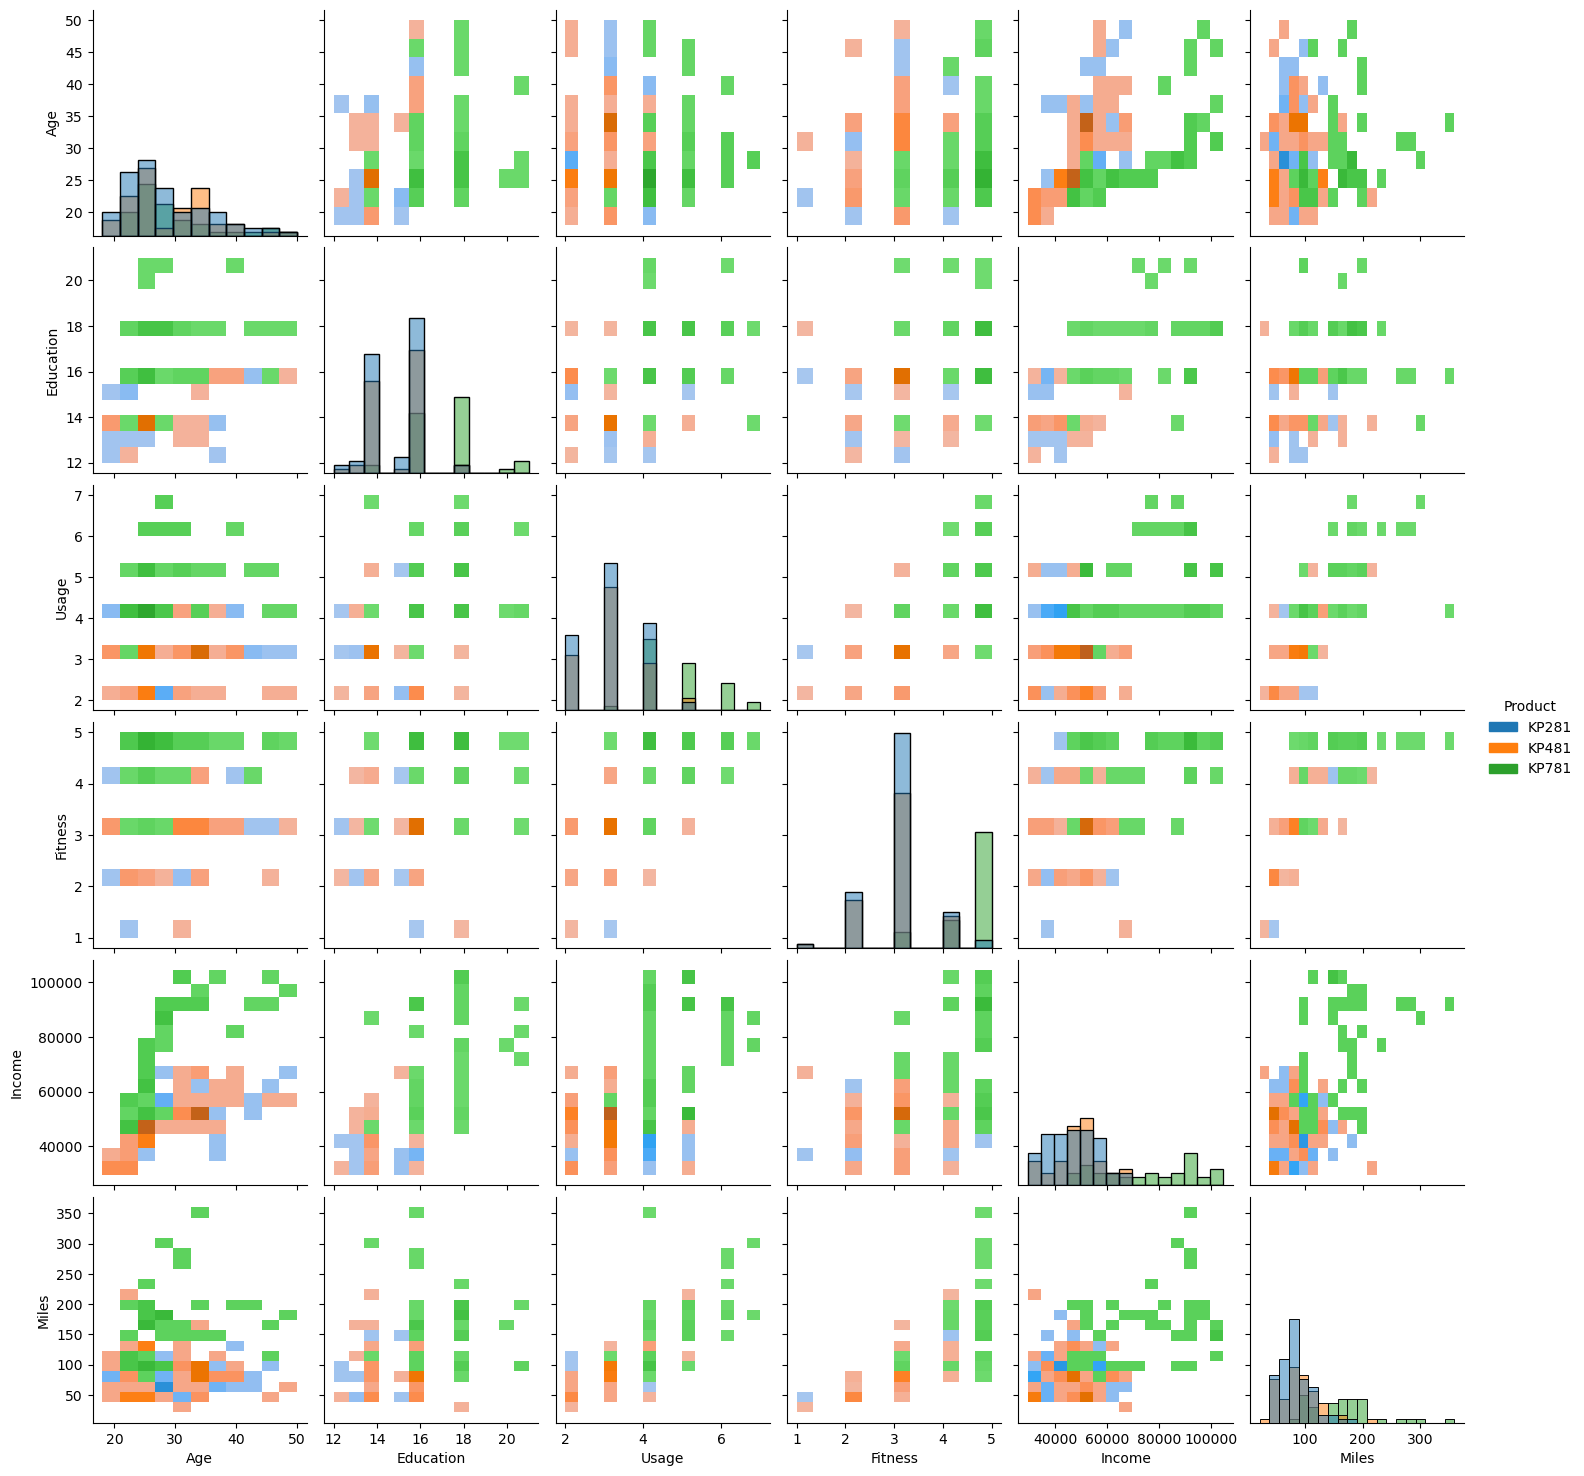

In [74]:
# Creating a pairplot using Seaborn library, with the DataFrame df, coloring the data points by 'Product' and using histograms as the plot type

sns.pairplot(df, hue='Product', kind='hist')

#### INSIGHTS

- There is an improvement in the fitness level with an increase in the planned number of miles per week.
- Increase in the usage of the product increase the fitness level.
- When customers plan to increase the usage of the product per week, that also leads to an increase in the number of miles they plan to run each week.
- Most of the KP781 customers lie in high income range, and KP281 in low income range
- Planned usage is higher for KP781 customer and lower for KP281 customers, and hence their fitness levels.
- The customers for all the three products are spread across the age range of 20 - 50
- Age doe snot seem to have much affect on the fitness, as the fitness level is spread across all the age ranges and not skewed.

In [75]:
# Calculating the correlation matrix for the DataFrame df
df.corr()

C:\Users\nevashist\AppData\Local\Temp\ipykernel_5556\4070331928.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


#### INSIGHTS

- Age does not seem to have a very high correlation with usage and fitness.
- Education seems to have a high correlation with income.
- Usage has a very high correlation with fitness and miles, which we have seen in the previous plot as well.
- Fitness seems to have a correlation with education, meaning educated people are more concerned about their fitness. Since education and income are ighly correlated, hence fitness and income also shows correlation in the above table.
- Planned usage is higher for KP781 customer and lower for KP281 customers, and hence their fitness levels.
- Miles has a high correlation with usage and fitness. Which is evident because running more miles, means increased usage which in turn helps improve the fitness level

C:\Users\nevashist\AppData\Local\Temp\ipykernel_5556\15695036.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

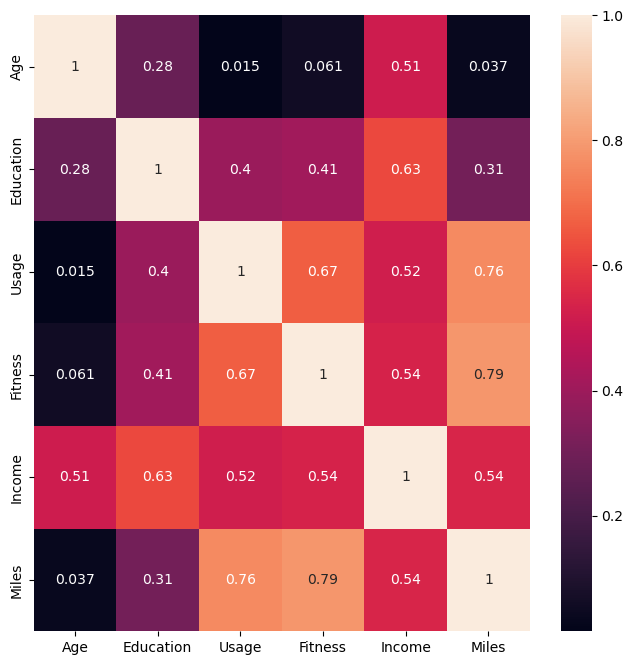

In [76]:
# Setting the figure size
plt.figure(figsize=(8, 8))

# Creating a heatmap of the correlation matrix for the DataFrame df
sns.heatmap(df.corr(), annot=True)

#### INSIGHTS

- Age has close to no correlation with planned usage, fitness and planned miles.
- Following are highly correlated:
    - Education and Income
    - Miles and Usage
    - Miles and Fitness
    - Usage and Fitness

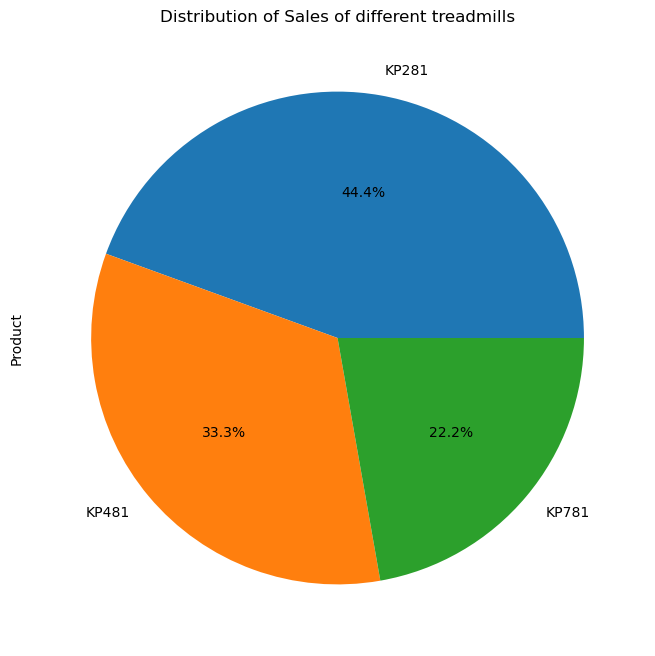

In [77]:
# Setting the figure size
plt.figure(figsize=(8, 8))

# Creating a pie chart to show the distribution of sales of different treadmills
df['Product'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))

# Adding a title to the plot
plt.title("Distribution of Sales of different treadmills")

# Displaying the pie chart
plt.show()

#### INSIGHTS

- Most Selling: KP281
- Least Selling: KP781

<Axes: xlabel='Miles', ylabel='Fitness'>

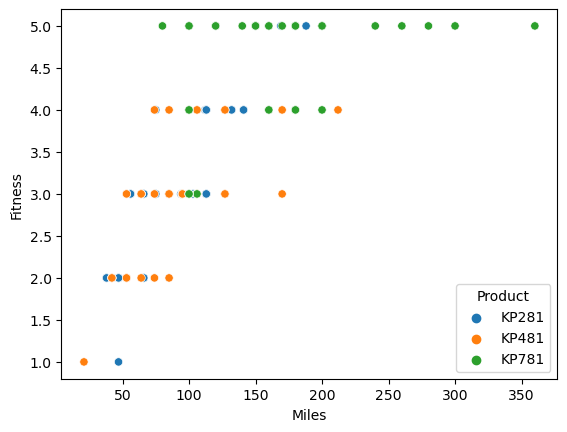

In [78]:
# Creating a scatter plot using Seaborn library, with 'Miles' on the x-axis, 'Fitness' on the y-axis,
# coloring the data points by 'Product', and using data from the DataFrame df
sns.scatterplot(x='Miles', y='Fitness', hue='Product', data=df)

#### INSIGHTS

- Increase in the usage of the product increase the fitness level.
- KP781 users have high fitness levels, compared to KP481 and KP281 who ahve averga efitness levels

<Axes: xlabel='Age', ylabel='Income'>

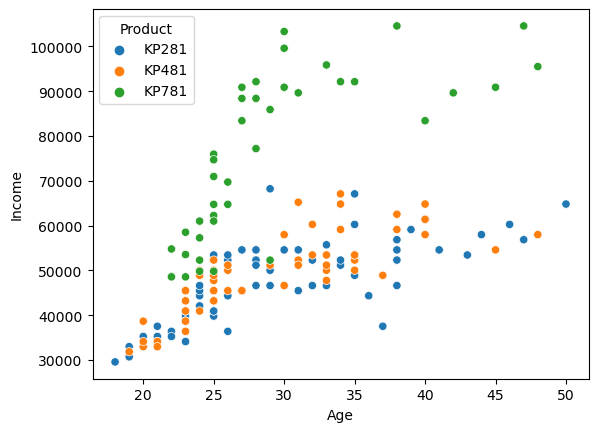

In [79]:
# Creating a scatter plot using Seaborn library, with 'Age' on the x-axis, 'Income' on the y-axis,
# coloring the data points by 'Product', and using data from the DataFrame df
sns.scatterplot(x='Age', y='Income', hue='Product', data=df)

#### INSIGHTS

- People with income groups equal to or higher that 50,000 tend to buy KP781

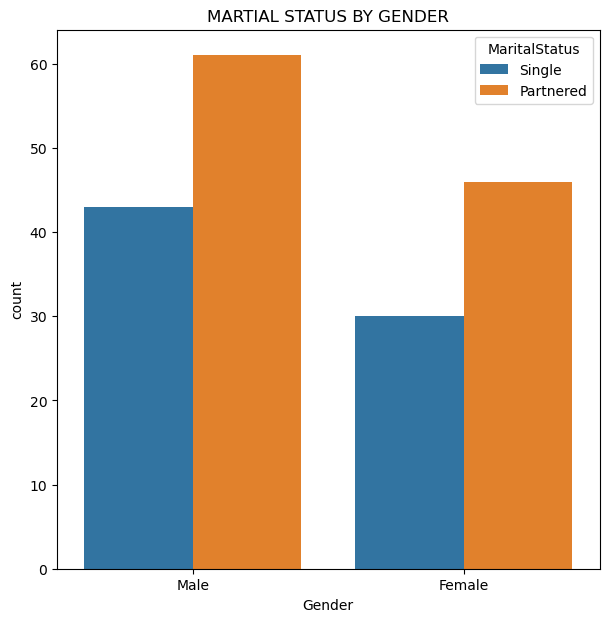

In [80]:
# Setting the figure size
plt.figure(figsize=(7, 7))

# Creating a countplot using Seaborn library, with 'Gender' on the x-axis, 'MaritalStatus' as the hue, and using data from the DataFrame df
sns.countplot(x='Gender', hue='MaritalStatus', data=df)

# Adding a title to the plot
plt.title("MARTIAL STATUS BY GENDER")

# Displaying the countplot
plt.show()

#### INSIGHTS

- Most of their customers are partnered irrespective of their gender.

<Figure size 1200x700 with 0 Axes>

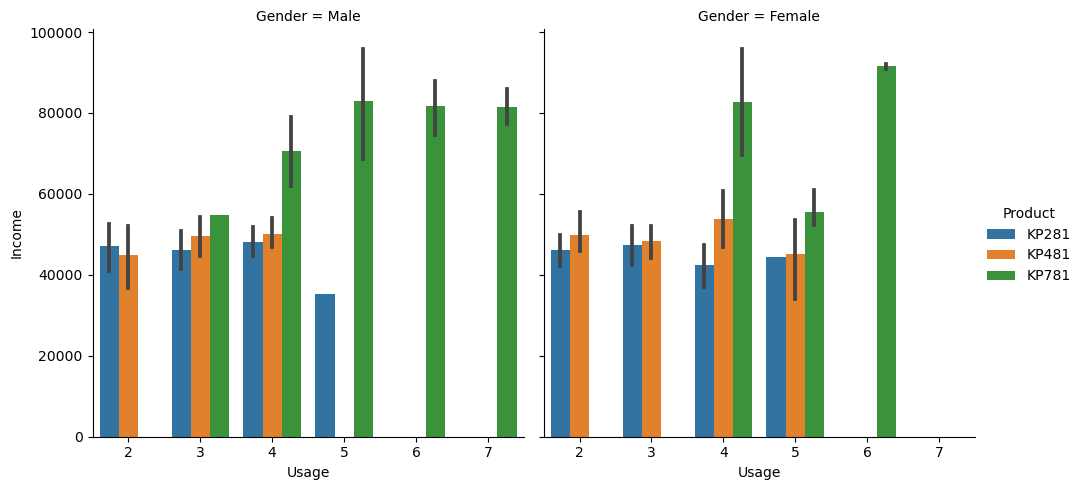

In [81]:
# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating a categorical plot using Seaborn library, with 'Usage' on the x-axis, 'Income' on the y-axis,
# 'Gender' as the column, 'Product' as the hue, using a bar plot, and using data from the DataFrame df
sns.catplot(x='Usage', y='Income', col='Gender', hue='Product', kind="bar", data=df)

#### INSIGHTS

- The average income value is higher for KP781 treadmill across both the genders and at all usage levels
- The lines are higher for bars between 4 and 6 in male category and between 4 and 5 in female category, representing high variability for KP781
- There are no line for KP281 in male and female category for usage between 4 and 5, representing no variability.

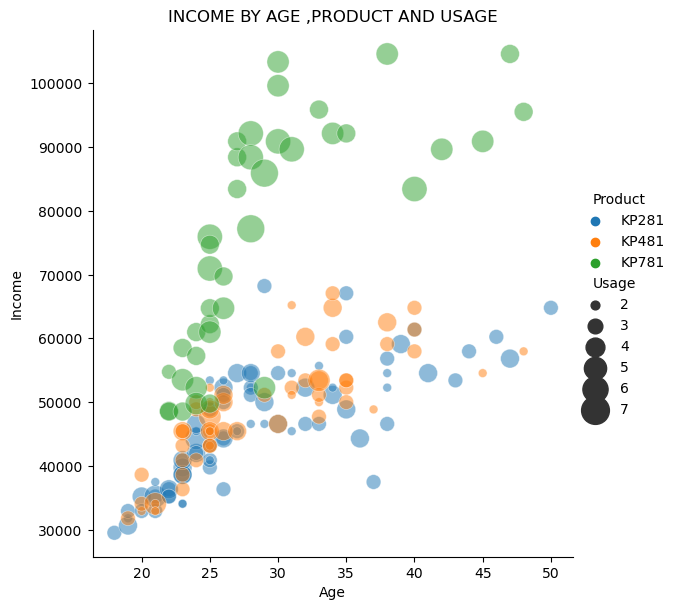

In [46]:
#scatter plot between income, age ,product and usage
sns.relplot(x="Age", y="Income", hue="Product", size="Usage",
            sizes=(40, 400), alpha=.5,
            height=6, data=df).set(title='INCOME BY AGE ,PRODUCT AND USAGE');

#### INSIGHTS

- The usage seems to be high for KP781 irrespective of age and income
- Most of the customers are less than 35 years of age and are under the income level of 70000
- The income levels for KP281 and KP481 are till 70000, while for KP781 most fo the customers lie above 60000. This may be because only peopole with high income are able to buy KP781 as it is expensive.
- There are some outliers for age and income, some customers are above 45 yeras of age and have income higher than 100k

<Axes: xlabel='Age', ylabel='Gender'>

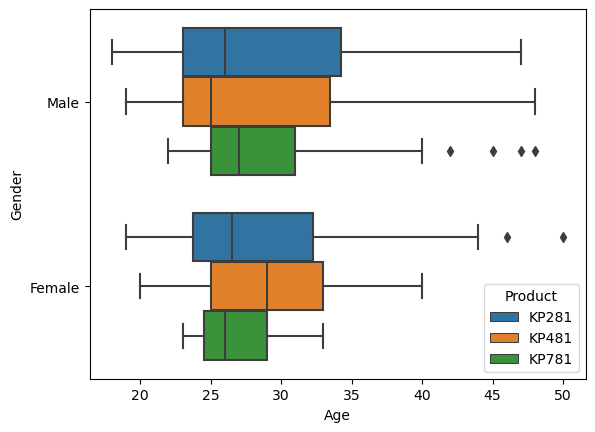

In [82]:
# Creating a box plot using Seaborn library, with 'Age' on the x-axis, 'Gender' on the y-axis,
# 'Product' as the hue, using data from the DataFrame df, and orienting the plot horizontally
sns.boxplot(y="Gender", x="Age", hue='Product', data=df, orient="horizontal")

#### INSIGHTS

- The median age of male and female customers is close to 26, except for KP481 where the median age for female customer is close to 29
- The IQR (Inter Quartile Range) for the products is as follows:
    - KP281: 24 - 35
    - KP481: 24 - 33
    - KP781: 25 - 30
- We have some outliers for KP781 males and Kp281 females
- The data is skewed towards the left for all product categories and genders except for KP481 females